In [3]:
import pandas as pd
import numpy as np
import re
import itertools
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ast
import string
import unidecode
from nltk import WordNetLemmatizer

pd.set_option('display.max_columns', None)

In [4]:
#Import dataset1
df1 = pd.read_csv('DataSet1.csv')

In [5]:
df1.head(1)

,Unnamed: 0,RecipeId,Name,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,0,38.0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...


In [6]:
#Change RecipeId to integer
df1['RecipeId'] = df1['RecipeId'].astype('int')

In [7]:
#Drop Unnamed column
df1.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
#Import dataset2
df2 = pd.read_csv('DataSet2.csv')

In [9]:
df2.head(1)

,Unnamed: 0,id,serving_size,servings,ingredients,ingredients_raw_str
0,0,96313,1 (155 g),8,"['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f..."


In [10]:
#Rename id to RecipeId
df2.rename(columns = {'id': 'RecipeId'}, inplace = True)

In [11]:
#Drop Unnamed column
df2.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
#Import dataset3
df3 = pd.read_csv('DataSet3.csv')

In [13]:
df3.head(1)

,Unnamed: 0,id,submitted,minutes,n_steps,n_ingredients
0,0,137739,2005-09-16,55,11,7


In [14]:
#Rename id to RecipeId
df3.rename(columns = {'id': 'RecipeId'}, inplace = True)

In [15]:
#Drop Unnamed column
df3.drop(columns = ['Unnamed: 0'], inplace = True)

# Merge all 3 datasets

In [16]:
df = df1.merge(df2, how = 'inner', on = 'RecipeId').merge(df3, how = 'inner', on = 'RecipeId')

In [17]:
df.head(5)

,RecipeId,Name,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,submitted,minutes,n_steps,n_ingredients
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1999-08-09,1485,13,4
1,39,Biryani,Chicken Breast,['Chicken Thigh & Leg' 'Chicken' 'Poultry' 'Me...,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,['Soak saffron in warm milk for 5 minutes and ...,1 (799 g),6,"['saffron', 'milk', 'hot green chili peppers',...","[""1 tablespoon saffron"",""4 teaspoons ...",1999-08-29,265,17,26
2,40,Best Lemonade,Beverages,['Low Protein' 'Low Cholesterol' 'Healthy' 'Su...,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"['Into a 1 quart Jar with tight fitting lid, p...",1 (212 g),4,"['sugar', 'lemons%2c rind of', 'fresh water', ...","[""1 1/2 cups sugar"",""1 tablespoon lem...",1999-09-05,35,8,6
3,41,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,['Beans' 'Vegetable' 'Low Cholesterol' 'Weekni...,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"['Drain the tofu, carefully squeezing out exce...",1 (932 g),2,"['extra firm tofu', 'eggplant', 'zucchini', 'r...","[""12 ounces extra firm tofu, water-packed...",1999-09-03,1460,18,15
4,43,Best Blackbottom Pie,Pie,['Dessert' 'Weeknight' 'Stove Top' '< 4 Hours'],437.9,19.3,10.9,94.3,267.6,58.0,1.8,42.5,7.0,"['Graham Cracker Crust: In small bowl, combine...",1 (171 g),8,"['graham cracker crumbs', 'sugar', 'butter', '...","[""1 1/4 cups graham cracker crumbs"",""1/4 ...",1999-08-21,140,35,15


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222700 entries, 0 to 222699
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             222700 non-null  int32  
 1   Name                 222700 non-null  object 
 2   RecipeCategory       222504 non-null  object 
 3   Keywords             222700 non-null  object 
 4   Calories             222700 non-null  float64
 5   FatContent           222700 non-null  float64
 6   SaturatedFatContent  222700 non-null  float64
 7   CholesterolContent   222700 non-null  float64
 8   SodiumContent        222700 non-null  float64
 9   CarbohydrateContent  222700 non-null  float64
 10  FiberContent         222700 non-null  float64
 11  SugarContent         222700 non-null  float64
 12  ProteinContent       222700 non-null  float64
 13  RecipeInstructions   222700 non-null  object 
 14  serving_size         222700 non-null  object 
 15  servings         

# Review Dataset Integration

In [19]:
#Importing review dataset
df_review = pd.read_csv('reviews_data.csv')

In [20]:
df_review.head(1)

,Unnamed: 0,User,RecipeId,Rating
0,0,2008,992,5


In [21]:
#Dropping Unnamed column
df_review.drop(columns = ['Unnamed: 0'], inplace = True)

### Merging the Review dataset with the Recipe dataset
Creating an Rating column that calculates the mean rating of the recipe and creating a review count column calculating the total reviews for the recipe

In [22]:
df['AggregatedRating'] = df_review.groupby('RecipeId')['Rating'].mean().round(2)

In [23]:
df['ReviewCount'] = df_review.groupby('RecipeId')['Rating'].count()

In [24]:
df.head(1)

,RecipeId,Name,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,submitted,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1999-08-09,1485,13,4,NaN,NaN


# Data Dictionary

|Column| Notes on Column|
|:--- |:--- |
|name|recipe name which will be used at the output of the recipe recommendation.|
|RecipeId|unique identifier for the recipes which will be used in the models to help recommend recipes to user.|
|Keywords| Words people use to search recipe|
|AggregatedRating|Aggregated mean rating of recipe|
|ReviewCount|Total reviews for recipe|
|Calories|Total calories per serving|
|FatContent|Total grams of Fat per serving|
|SaturatedFatContent|Total grams of saturated fat per serving|
|CholesterolContent|Total grams of cholesterol per serving|
|FiberContent|Total grams of fiber per serving|
|SugarContent|Total grams of sugar per serving|
|ProtienContent|Total grams of protein per serving|
|RecipeInstruction|Steps to create recipe|
|serving_size|size of 1 serving|
|servings|Number of servings from recipe|
|ingredients|ingredients to create recipe|
|ingredients_raw_str|ingredients and quantity to create recipe|
|submitted|date recipe was submitted|
|minutes|shows the total minutes it takes to prep and cook the recipe|
|n_steps|number of steps the recipe takes to prep and cook|
|n_ingredients|number of ingredients to cook recipe|

# Data Preprocessing
- Rename name column to RecipeName (personal preference)
- Change submitted column into year, month, and weekday
- include only the total grams per single serving for serving_size
- Check for missing values in each column
- Check for any duplicate values in rows


**Rename name to recipe_name**

In [25]:
#Rename name column to recipe_name
df.rename(columns = {'Name': 'RecipeName'}, inplace = True)

In [26]:
#Sanity Check
df.head(1)

,RecipeId,RecipeName,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,submitted,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1999-08-09,1485,13,4,NaN,NaN


**Change sumbitted into month, year, day of week**

In [27]:
#Checking submitted type
type(df['submitted'][0])

str

In [28]:
#Sample look at some submitted dates
df['submitted'][10:30]

10    1999-08-31
11    1999-09-08
12    1999-09-15
13    1999-08-14
14    1999-09-13
15    1999-08-19
16    1999-09-07
17    1999-09-10
18    1999-09-01
19    1999-08-24
20    1999-09-10
21    1999-08-24
22    1999-09-07
23    1999-09-12
24    1999-09-06
25    1999-08-13
26    1999-08-12
27    1999-09-12
28    1999-08-17
29    1999-08-06
Name: submitted, dtype: object

Observation: dates have the same format yyyy-mm-dd <br>
- split column on '-' delimiter

In [29]:
#Split submitted column
df[['year','month','day']] = df['submitted'].str.split('-',expand = True)

In [30]:
#Check dataframe
df.head(1)

,RecipeId,RecipeName,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,submitted,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount,year,month,day
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1999-08-09,1485,13,4,NaN,NaN,1999,08,09


Notes: <br>
- Change column day into day of week - as this info will be more useful for EDA
- Change all three columns from string to number

In [31]:
#Getting the day of the week
#Change submitted to date, then use isoweekday function
df['submitted'] = pd.to_datetime(df['submitted'])
df['day_of_week'] = df['submitted'].dt.dayofweek

In [32]:
#Check
df.head(1)

,RecipeId,RecipeName,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,submitted,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount,year,month,day,day_of_week
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1999-08-09,1485,13,4,NaN,NaN,1999,08,09,0


In [33]:
#Drop submitted row and day row
df.drop(columns = ['submitted', 'day'], axis = 1, inplace = True)

In [34]:
#Change month, year, day of week into numbers
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])
df['day_of_week'] = pd.to_numeric(df['day_of_week'])

In [35]:
#Check
print(type(df['year'][0]))
print(type(df['month'][0]))
print(type(df['day_of_week'][0]))
df.head(1)

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


,RecipeId,RecipeName,RecipeCategory,Keywords,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions,serving_size,servings,ingredients,ingredients_raw_str,minutes,n_steps,n_ingredients,AggregatedRating,ReviewCount,year,month,day_of_week
0,38,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,['Dessert' 'Low Protein' 'Low Cholesterol' 'He...,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,['Toss 2 cups berries with sugar.'\n 'Let stan...,1 (225 g),4,"['blueberries', 'granulated sugar', 'vanilla y...","[""4 cups blueberries, fresh or frozen "",""...",1485,13,4,NaN,NaN,1999,8,0


**recipe_serving column change to only reflect grams for the serving size**

In [36]:
df['serving_size']

0         1 (225 g)
1         1 (799 g)
2         1 (212 g)
3         1 (932 g)
4         1 (171 g)
            ...    
222695    1 (249 g)
222696     1 (14 g)
222697    1 (539 g)
222698     1 (71 g)
222699    1 (170 g)
Name: serving_size, Length: 222700, dtype: object

In [37]:
#Only include everything in between brackets and remove letter g
pattern = r'\((.*?)\)'

def extract_inside_parentheses(serving_size):
    matches = re.findall(pattern, serving_size)
    if matches:
        return int(matches[0].replace(' g',''))
    return None
    
    

df['serving_size'] = df['serving_size'].apply(extract_inside_parentheses)



In [38]:
print(f"type of serving size data is: {type(df['serving_size'][0])}")
df['serving_size']

type of serving size data is: <class 'numpy.int64'>


0         225
1         799
2         212
3         932
4         171
         ... 
222695    249
222696     14
222697    539
222698     71
222699    170
Name: serving_size, Length: 222700, dtype: int64

**Missing Value columns**

In [39]:
df.isnull().mean() * 100

RecipeId                0.000000
RecipeName              0.000000
RecipeCategory          0.088011
Keywords                0.000000
Calories                0.000000
FatContent              0.000000
SaturatedFatContent     0.000000
CholesterolContent      0.000000
SodiumContent           0.000000
CarbohydrateContent     0.000000
FiberContent            0.000000
SugarContent            0.000000
ProteinContent          0.000000
RecipeInstructions      0.000000
serving_size            0.000000
servings                0.000000
ingredients             0.000000
ingredients_raw_str     0.000000
minutes                 0.000000
n_steps                 0.000000
n_ingredients           0.000000
AggregatedRating       33.635833
ReviewCount            33.635833
year                    0.000000
month                   0.000000
day_of_week             0.000000
dtype: float64

Missing values in Aggregated Rating is only 33%. My assumption that a null value in the aggregated rating indicates that the recipe is not good as no-one rated it or is a recipe someone would not like to try. As such, we will drop all these rows.

In [40]:
df = df.dropna(subset = ['AggregatedRating'])

In [41]:
df.isnull().mean() * 100

RecipeId               0.000000
RecipeName             0.000000
RecipeCategory         0.080518
Keywords               0.000000
Calories               0.000000
FatContent             0.000000
SaturatedFatContent    0.000000
CholesterolContent     0.000000
SodiumContent          0.000000
CarbohydrateContent    0.000000
FiberContent           0.000000
SugarContent           0.000000
ProteinContent         0.000000
RecipeInstructions     0.000000
serving_size           0.000000
servings               0.000000
ingredients            0.000000
ingredients_raw_str    0.000000
minutes                0.000000
n_steps                0.000000
n_ingredients          0.000000
AggregatedRating       0.000000
ReviewCount            0.000000
year                   0.000000
month                  0.000000
day_of_week            0.000000
dtype: float64

In [42]:
#Checking AggregatedRatings of recipe Category distribution frequency
df_nullCat = df[df['RecipeCategory'].isna()]

df_nullCat['AggregatedRating'].value_counts()

5.00    37
4.00    20
4.75     8
4.50     7
3.00     6
4.67     4
0.00     3
4.86     3
3.33     2
4.80     2
4.60     2
4.62     2
1.50     1
4.69     1
3.22     1
4.58     1
3.88     1
3.89     1
4.29     1
3.75     1
3.25     1
4.90     1
4.46     1
3.84     1
4.64     1
4.17     1
4.89     1
4.88     1
4.71     1
4.94     1
2.50     1
4.43     1
4.11     1
4.14     1
4.77     1
Name: AggregatedRating, dtype: int64

Although a lot of recipes have a high review score. For recipe's will null values in category, I will denote them as 'Other'

In [43]:
#Replacing null with Other
df['RecipeCategory'].fillna('Other', inplace = True)

In [44]:
#Sanity Check
df.isnull().sum()

RecipeId               0
RecipeName             0
RecipeCategory         0
Keywords               0
Calories               0
FatContent             0
SaturatedFatContent    0
CholesterolContent     0
SodiumContent          0
CarbohydrateContent    0
FiberContent           0
SugarContent           0
ProteinContent         0
RecipeInstructions     0
serving_size           0
servings               0
ingredients            0
ingredients_raw_str    0
minutes                0
n_steps                0
n_ingredients          0
AggregatedRating       0
ReviewCount            0
year                   0
month                  0
day_of_week            0
dtype: int64

**Duplicate Rows**

In [45]:
#Check if any duplicate rows
df.duplicated().sum()

0

### Reseting Index

In [46]:
df.reset_index(drop = True, inplace = True)

### Sanity Check on Data types

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147793 entries, 0 to 147792
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   RecipeId             147793 non-null  int32  
 1   RecipeName           147793 non-null  object 
 2   RecipeCategory       147793 non-null  object 
 3   Keywords             147793 non-null  object 
 4   Calories             147793 non-null  float64
 5   FatContent           147793 non-null  float64
 6   SaturatedFatContent  147793 non-null  float64
 7   CholesterolContent   147793 non-null  float64
 8   SodiumContent        147793 non-null  float64
 9   CarbohydrateContent  147793 non-null  float64
 10  FiberContent         147793 non-null  float64
 11  SugarContent         147793 non-null  float64
 12  ProteinContent       147793 non-null  float64
 13  RecipeInstructions   147793 non-null  object 
 14  serving_size         147793 non-null  int64  
 15  servings         

# Ingredients Column Preprocessing

## Cleaning ingredients column
- clean all strings in the ingredients list before vectorizing the data
- cleaning will include:
    - removing any punctuations
    - lemmantizing the words
    - ensure all characters are lowercase
    - removing any stop words
    - removing any non-alphabetical characters

### Stemming vs Lemmetizing
Stemming involves removing the last few letters from a word. This leads to incorret meaning and spelling of words. <br>
Lemmatizing considers the context of the word and converts it into a meaningful base or root word. Lemmatizing is computationally more expensive, but we require the ingredients to have meaning in order for us to run the model. As such, we chose to lemmatize the ingredients instead of stemming it.<br>


We will create a function that preprocesses the ingredients column.

In [48]:
#Change ingredients column from string to list
df['ingredients'] = df['ingredients'].apply(lambda s: list(ast.literal_eval(s)))

In [49]:
def ingredient_preprocess(ingredients):
    
    ingrd_list = []
    translator = str.maketrans('','', string.punctuation)
    num_pattern = r'[0-9]'
    non_alphabet = r'[\W_]'
    lemmatizer = WordNetLemmatizer()
    for i in ingredients:
        #remove punctuations
        items = i.translate(translator)
        
        #Making all characters lowercase
        items = i.lower()
        
        #remove any numbers
        items = re.sub(num_pattern, ' ', items)
        
        #remove accents
        items = unidecode.unidecode(items)
        
        #remove any non-alphabet characters
        items = re.sub(non_alphabet, ' ', items)
        
        #Lemmatize words
        items = lemmatizer.lemmatize(items)
        
        ingrd_list.append(items)
    return ingrd_list
   

In [50]:
df['ingredients'] = df['ingredients'].apply(lambda x: ingredient_preprocess(x))

In [51]:
df['ingredients'][1]

['sugar',
 'flour',
 'salt',
 'heavy cream',
 'unsalted butter',
 'pecan',
 'vanilla',
 'corn oil',
 'sugar',
 'flour',
 'cinnamon',
 'baking powder',
 'salt',
 'egg',
 'carrot',
 'pecan',
 'raisin',
 'cream cheese frosting',
 'unsalted butter',
 'cream cheese',
 'powdered sugar',
 'vanilla extract',
 'coconut']

### Intial EDA on ingredients column

In [52]:
#Comipling all ingredients into a list
all_ingredients = [ingredient for ingredient_list in df['ingredients'] for ingredient in ingredient_list]

In [53]:
#Determining total ingredients in data set
print(f'Total # of ingredients: {len(all_ingredients)}')

Total # of ingredients: 1377833


In [54]:
#Determining total unique ingredients in data set
print(f'Total # unique ingredients: {len(set(all_ingredients))}')

Total # unique ingredients: 12924


In [55]:
ingredients_string = ' '.join(all_ingredients)

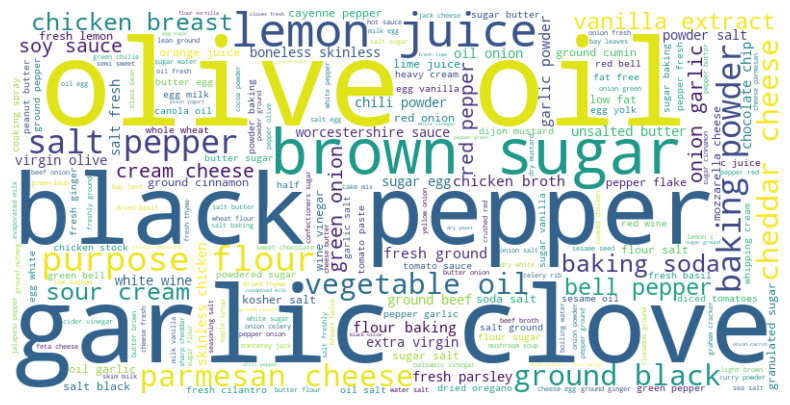

In [56]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

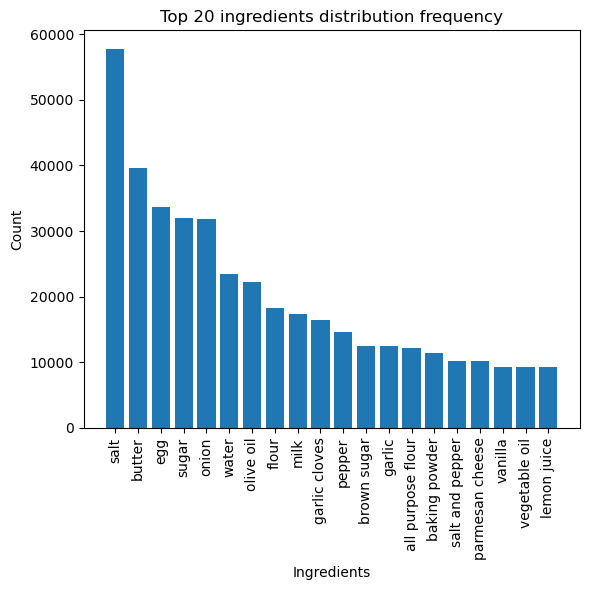

In [57]:
ingredient_count = Counter(all_ingredients)

top_N = 20
top_ingredients = ingredient_count.most_common(top_N)

values = [value for value, frequency in top_ingredients]
frequencies = [frequency for value, frequency in top_ingredients]

#Plot top 20 ingredients by frequency
plt.figure(figsize= (6,6))

plt.bar(values, frequencies)

plt.title(f'Top {top_N} ingredients distribution frequency')
plt.xlabel('Ingredients')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Most used ingredients in our datasets are condiments, spices or cooking oils. This makes sense as most recipes utilize these common ingredients to cook. We need to find a way to remove these common ingredients to allow us to better visualize the main ingredients of recipe such as the protein and vegetables

# Ensuring that both the review and recipe datasets have the same recipes

In [ ]:
# Find common recipe IDs
common_recipe_ids = set(df['RecipeId'].unique()).intersection(df_review['RecipeId'].unique())

# Filter and update df and df_review
df = df[df['RecipeId'].isin(common_recipe_ids)]
df_review = df_review[df_review['RecipeId'].isin(common_recipe_ids)]

# Get unique recipe IDs from both DataFrames
unique_recipe_ids_df = set(df['RecipeId'].unique())
unique_recipe_ids_df_review = set(df_review['RecipeId'].unique())

# Compare the sets of unique recipe IDs
if unique_recipe_ids_df == unique_recipe_ids_df_review:
    print("All recipe IDs are the same in both DataFrames.")
else:
    print("Recipe IDs are not the same in both DataFrames.")

# Exporting Cleaned Dataset

In [ ]:
df.to_csv('Cleaned_recipes.csv')
df_review.to_csv('Cleaned_reviews.csv')